# import

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# result

all the data

Accuracy: 66.53%

 Training Accuracy score: 0.6661648613915917
Testing Accuracy score: 0.6652959318548979
classification_report 
               precision    recall  f1-score   support

           0       0.70      0.02      0.04      2309
           1       0.66      0.99      0.80      4500

    accuracy                           0.67      6809
   macro avg       0.68      0.51      0.42      6809
weighted avg       0.68      0.67      0.54      6809



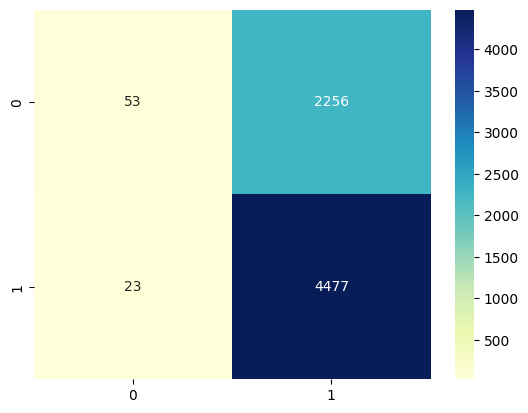

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/cleandata.csv')
# tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
# x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf= LogisticRegression(random_state=42,solver="liblinear")
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

tomlink + random undersimpling

Accuracy: 77.00%

 Training Accuracy score: 0.7611544292830843
Testing Accuracy score: 0.7700303161541793
classification_report 
               precision    recall  f1-score   support

           0       0.73      0.86      0.79      2309
           1       0.83      0.68      0.75      2309

    accuracy                           0.77      4618
   macro avg       0.78      0.77      0.77      4618
weighted avg       0.78      0.77      0.77      4618



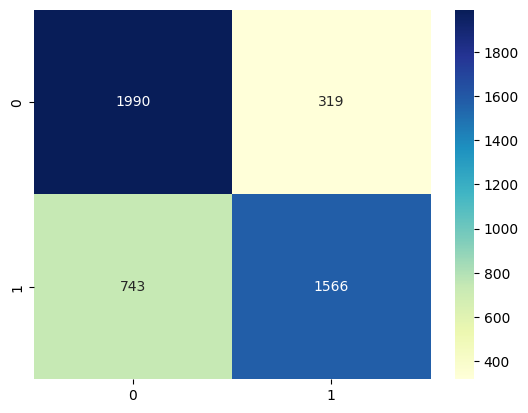

In [12]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
from sklearn.pipeline import Pipeline
df = pd.read_csv('./Data/cleandata.csv')
tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

x, y = tl.fit_resample(x, y)
# Convert the list to a DataFrame
y = pd.DataFrame({'IsABot': y})

# Concatenate the two DataFrames
data = pd.concat([x, y], axis=1)
df1=data[data.IsABot== 1].head(11543)
df2=data[data.IsABot== 0].head(11543)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

-oversimpling

Accuracy: 79.69%

 Training Accuracy score: 0.801755506791478
Testing Accuracy score: 0.7969114542828575
classification_report 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      4501
           1       0.80      0.80      0.80      4500

    accuracy                           0.80      9001
   macro avg       0.80      0.80      0.80      9001
weighted avg       0.80      0.80      0.80      9001



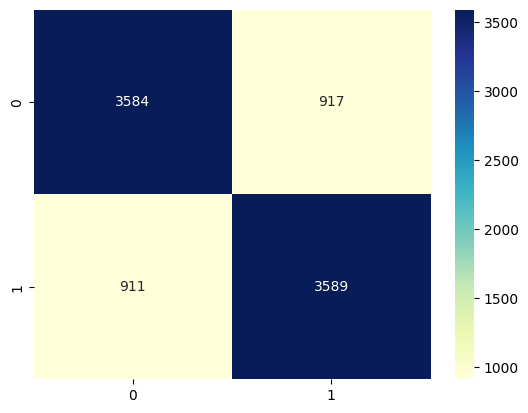

In [16]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
df = pd.read_csv('./Data/cleandata.csv')
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

# feat_importances = pd.Series(pipeline['rf'].feature_importances_, index=x.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

- random undersimpling

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')

df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
   
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

- random undersimpling + StandardScaler

Accuracy: 89.39%

 Training Accuracy score: 0.8915340909090909
Testing Accuracy score: 0.8938636363636364
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      2200
           1       0.85      0.96      0.90      2200

    accuracy                           0.89      4400
   macro avg       0.90      0.89      0.89      4400
weighted avg       0.90      0.89      0.89      4400



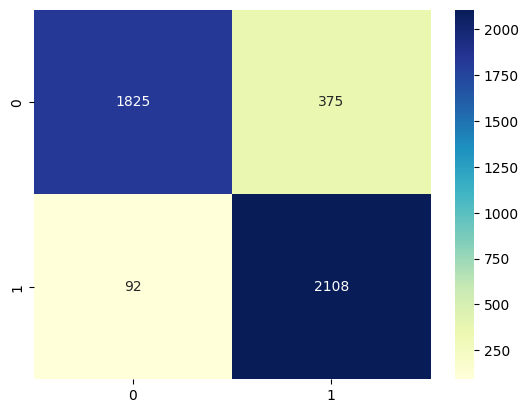

In [17]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')

df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 80.87%

 Training Accuracy score: 0.8126723903500253
Testing Accuracy score: 0.8087321317588564
classification_report 
               precision    recall  f1-score   support

           0       0.76      0.69      0.72      2309
           1       0.83      0.87      0.85      4127

    accuracy                           0.81      6436
   macro avg       0.80      0.78      0.79      6436
weighted avg       0.81      0.81      0.81      6436



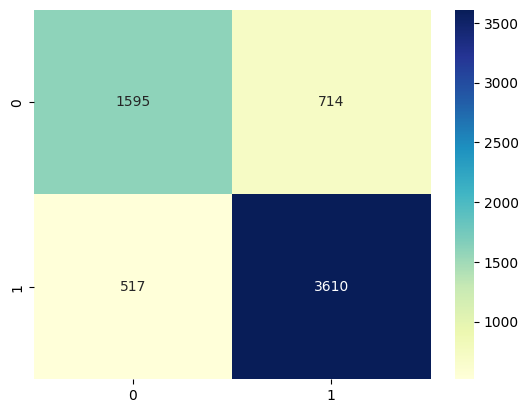

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df = pd.read_csv('./Data/cleandata.csv')

tl = TomekLinks()
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x, y = tl.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

# with features selection

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')
data1=data1.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]

# followers/lastpost - followers :negative 
# engagment rate - followers :positive 
# following - following/years:negative
# followers/lastpost - engagment rate : negative 
# tweet by houre -tweet by day : positive 


# 'verified', 'statuses', 'location', 'date_joined',
#        'most_recent_post', 'following', 'followers', 'favourites', 'lists',
#        'tweet_language', 'tweets_this_week', 'retweet', 'retweeted_count',
#        'url', 'userNameScore', 'avg_tweets_by_hour_of_day',
#        'avg_tweets_by_day_of_week', 'following/years', 'followers/lastpost',
#        'engagment_rate', 'description', 'screen_name', 'IsABot'

# df=df.loc[:,['verified', 'statuses', 'location', 'date_joined',
#        'most_recent_post', 'following', 'followers', 'favourites', 'lists',
#        'tweet_language', 'tweets_this_week', 'retweet', 'retweeted_count',
#        'url', 'userNameScore', 'avg_tweets_by_hour_of_day',
#        'avg_tweets_by_day_of_week','description','screen_name','IsABot']]



- random undersimpling 

Accuracy: 85.39%

 Training Accuracy score: 0.8504545454545455
Testing Accuracy score: 0.8538636363636364
classification_report 
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      2200
           1       0.80      0.93      0.86      2200

    accuracy                           0.85      4400
   macro avg       0.86      0.85      0.85      4400
weighted avg       0.86      0.85      0.85      4400



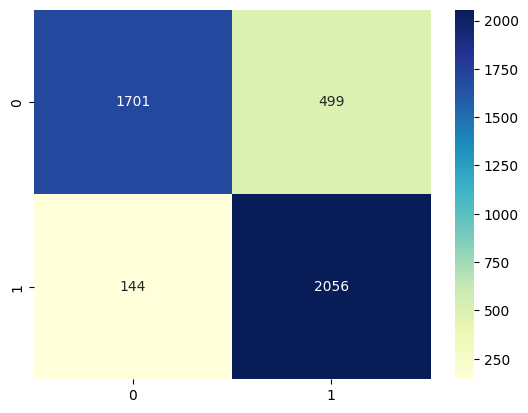

In [20]:
df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

- oversimpling

Accuracy: 77.47%

 Training Accuracy score: 0.7808116441209967
Testing Accuracy score: 0.7746917009221198
classification_report 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      4501
           1       0.75      0.82      0.78      4500

    accuracy                           0.77      9001
   macro avg       0.78      0.77      0.77      9001
weighted avg       0.78      0.77      0.77      9001



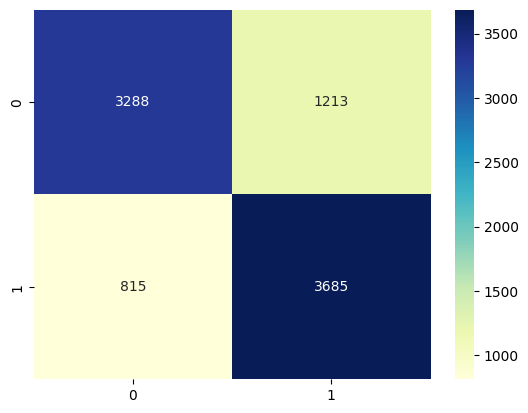

In [21]:
from imblearn.over_sampling import SMOTE
df=data1
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

tomklink undersimpling

Accuracy: 81.62%

 Training Accuracy score: 0.8150850632121117
Testing Accuracy score: 0.8161672908863921
classification_report 
               precision    recall  f1-score   support

           0       0.78      0.69      0.73      2309
           1       0.83      0.89      0.86      4099

    accuracy                           0.82      6408
   macro avg       0.81      0.79      0.80      6408
weighted avg       0.81      0.82      0.81      6408



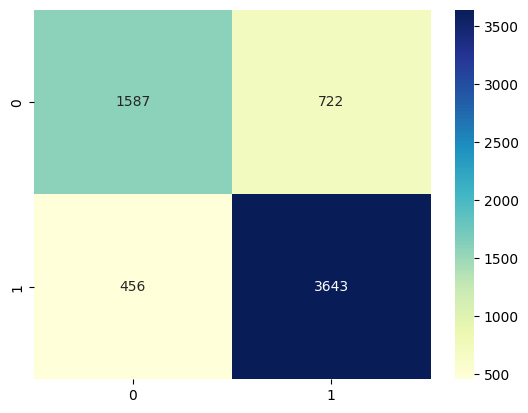

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
df=data1
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
clf = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  LogisticRegression(random_state=42,solver="liblinear")) # Training a random forest classifier on the data
])

# Train the pipeline on the data
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

# hyperparametre


In [39]:
from sklearn.model_selection import GridSearchCV
# Creating lists of parameter for LogisticRegression
data1 = pd.read_csv('./Data/cleandata.csv')

df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
# Create a logistic regression pipeline with StandardScaler
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42,max_iter=10000))
])

# Define the hyperparameters to search
param_grid = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=3)
grid_search.fit(x ,y)

grid_search.best_params_

d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "d:

{'logreg__C': 1, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}

Accuracy: 89.70%

 Training Accuracy score: 0.8898295454545454
Testing Accuracy score: 0.8970454545454546
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      2200
           1       0.85      0.97      0.90      2200

    accuracy                           0.90      4400
   macro avg       0.91      0.90      0.90      4400
weighted avg       0.91      0.90      0.90      4400



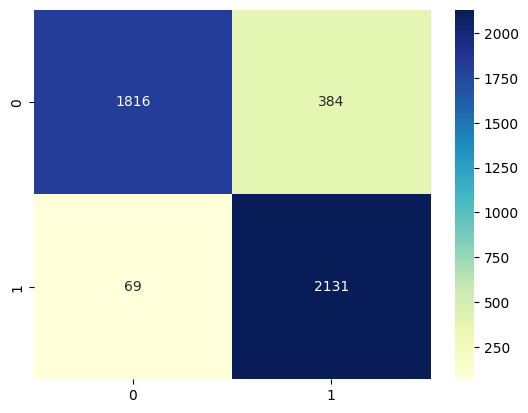

In [42]:
{'logreg__C': 1, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
data1 = pd.read_csv('./Data/cleandata.csv')

df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf',  LogisticRegression(random_state=42,solver="liblinear",penalty='l1',C=1,max_iter=1000)) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)
score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

#  cross validation

In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score


data1 = pd.read_csv('./Data/cleandata.csv')

df1=data1[data1.IsABot== 1].head(1195)
df2=data1[data1.IsABot== 0].head(1195)
df = pd.concat([df1, df2], ignore_index=True)
x=df.iloc[:, :-1]
y = df.IsABot.values.tolist()

smote = SMOTE(random_state=10)
x, y =smote.fit_resample(x, y)
k_folds = KFold(n_splits = 10)
clf= LogisticRegression(random_state=42,solver="liblinear")
scores = cross_val_score(clf, x, y, cv = k_folds)

print("Average CV Score: ", scores.mean())
# Average CV Score:  0.7622272727272728

Average CV Score:  0.7622272727272728
